# Random graph generator

In [15]:
import random
n = [10, 20, 30 , 40, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]
saturation = 0.6

#n_ver, n_edg = total no of vertices and edges respectively
def GraphGenerate(n_ver): 
    n_edg = int (saturation * 0.5 * n_ver * (n_ver - 1))
    f = open("graph%s.txt" %n_ver, 'w')

    v1 = []
    v2 = []

    for i in range (n_ver): #wszystkie możliwe kombinacje krawedzi (bez self loops)
        v1+=list(range(i+1, n_ver))
        temp =[]
        for x in range (n_ver-i-1):
            temp.append(i)
        v2+=temp


    edges_set = list(zip(v1,v2))
    #print(edges_set)
    random.shuffle(edges_set)
    #print(edges_set)

    for i in range (n_edg):
        f.write(str(edges_set[i][0]) + " " + str(edges_set[i][1]) + "\n")
    f.close()

for ver in n:
    GraphGenerate(ver)
    #print ("DONE ", ver)

# Generating edges to be searched

In [16]:
import random
n = [10, 20, 30 , 40, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]

def SearchGenerate(number_of_ver): 
    vertices = list(range(number_of_ver))
    f = open("search%s.txt" %number_of_ver, 'w')
  
    to_search = []
    for i in range (number_of_ver):
        temp = random.choice(vertices)
        temp2= random.choice(vertices)
        to_search.append((temp, temp2))

    #print(to_search)
    random.shuffle(to_search)

    for i in range (number_of_ver):
        f.write(str(to_search[i][0]) + " " + str(to_search[i][1]) + "\n")
    f.close()

for ver in n:
    SearchGenerate(ver)
    #print ("DONE ", ver)

# Results parsing (charts)

In [1]:
import matplotlib.pyplot as plt

In [2]:
label = ["Vertex Matrix", "Incidence Matrix", "Edge List", "Incidence List"]
x = [10, 20, 30 , 40, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [3]:
def read_data (filename):
    data = []
    f = open(filename + ".txt")
    for no in x:
        temp = f.readline()
        temp = float(temp[temp.find(" ") + 1:temp.find("\n")])
        #print(temp)
        data.append(temp)
    f.close()
    return data;


In [4]:
VertexMatrix = read_data("Vertex Matrix")
IncidenceMatrix = read_data("Incidence Matrix")
EdgeList = read_data("Edge List")
IncidenceList = read_data("Incidence List")
print(label[0], VertexMatrix)
print(label[1], IncidenceMatrix)
print(label[2], EdgeList)
print(label[3], IncidenceList)

Vertex Matrix [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Incidence Matrix [0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.055, 0.116667, 0.245, 0.336, 0.5, 0.677143, 0.88125, 1.115556, 1.4]
Edge List [0.0, 0.0, 0.0, 0.0, 0.02, 0.02, 0.1, 0.193333, 0.4525, 0.51, 0.715, 0.915714, 1.36625, 1.65, 1.982]
Incidence List [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005, 0.0, 0.0025, 0.002, 0.005, 0.002857, 0.00375, 0.003333, 0.007]


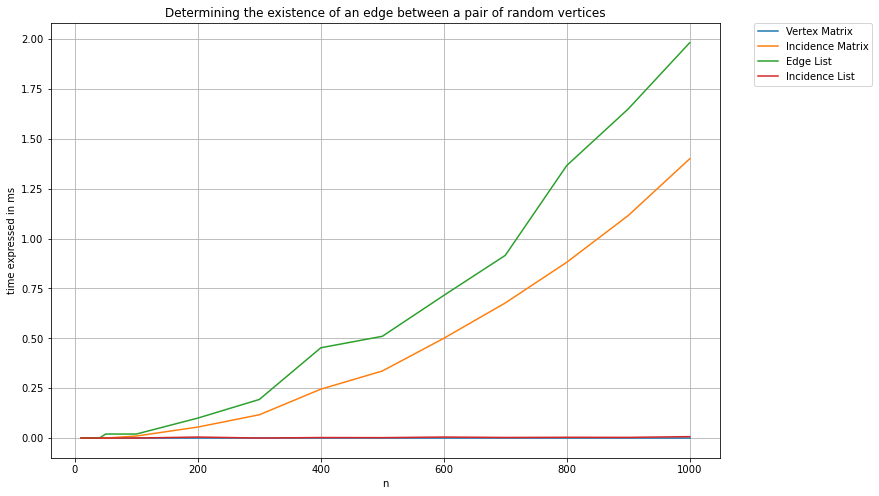

In [6]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(x, VertexMatrix, label = label[0])
ax.plot(x, IncidenceMatrix, label = label[1])
ax.plot(x, EdgeList, label = label[2])
ax.plot(x, IncidenceList, label = label[3])
ax.set_xlabel("n")
ax.set_ylabel("time expressed in ms")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad = 0.)
#ax.set_yscale("log")
plt.grid(True)
ax.set_title("Determining the existence of an edge between a pair of random vertices")
plt.show
plt.savefig("chart.svg")